In [367]:
import pandas as pd
import numpy as np

df=pd.read_csv('../DATA/combined_data.csv')


## Performing ARIMA on Immigrant Population Percentage Data

<Axes: title={'center': 'US Immigrant Population Percentage'}>

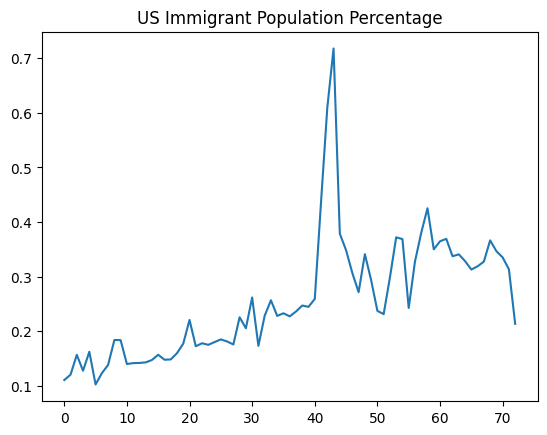

In [368]:
df1 = df["migrant_pop_percentage"]
df1.plot(title="US Immigrant Population Percentage")



<Axes: title={'center': 'Log of US Immigrant Population Percentage'}>

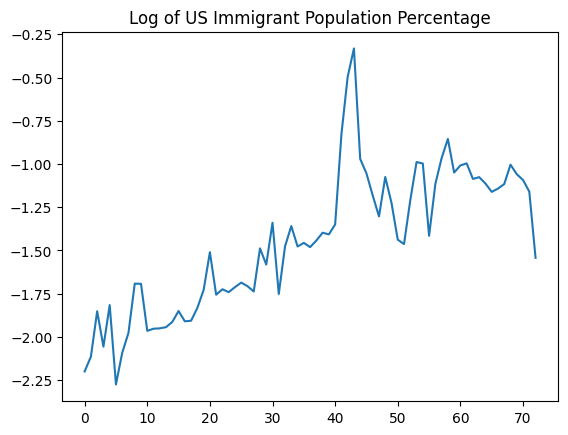

In [369]:

df1 = np.log(df1)
df1.plot(title="Log of US Immigrant Population Percentage")

In [370]:
# training set
# msk = (df1.index < len(df1)-15)
# df_train = df1[msk].copy()
# df_test = df1[~msk].copy()

## Check for Stationarity

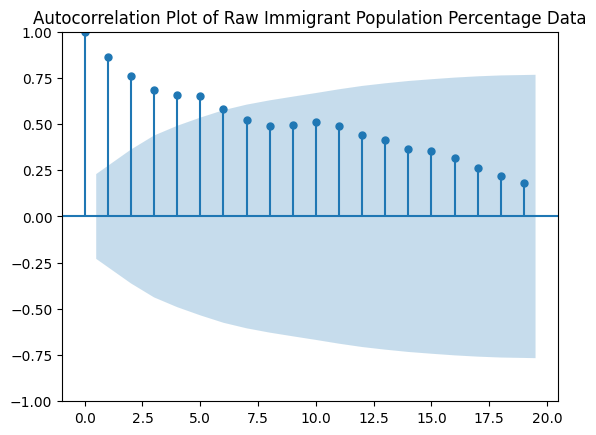

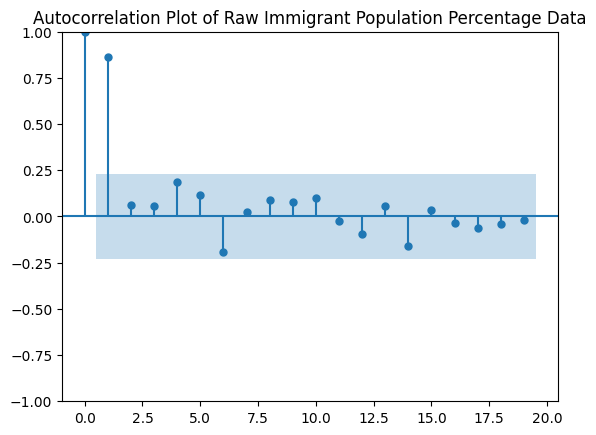

In [371]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

acf_original = plot_acf(df1, title="Autocorrelation Plot of Raw Immigrant Population Percentage Data")
pacf_original = plot_pacf(df1, title="Autocorrelation Plot of Raw Immigrant Population Percentage Data")

In [372]:
from statsmodels.tsa.stattools import adfuller
adf_test = adfuller(df1)
print(f'p-value: {adf_test[1]}')

p-value: 0.11337830583129122


The ACF has a positive decline, and the PACF has a spike at the beginning, so these indicate the data are not stationary. Additionally, the p-value is way too high. So let's transform da time series to stationary by differencing!

## Stationarity: Differencing

<Axes: title={'center': 'Immigrant Population Percentage Differenced Once'}>

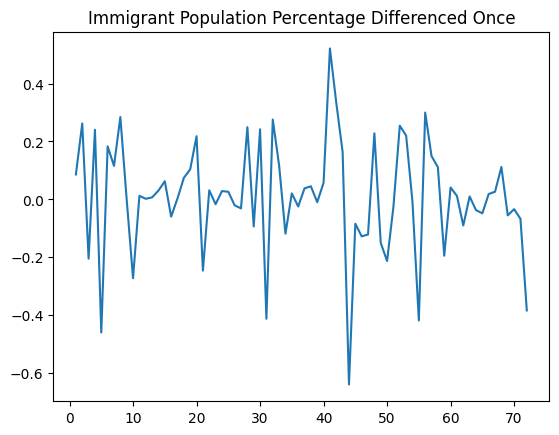

In [373]:
df1_diff = df1.diff().dropna()
df1_diff.plot(title="Immigrant Population Percentage Differenced Once")

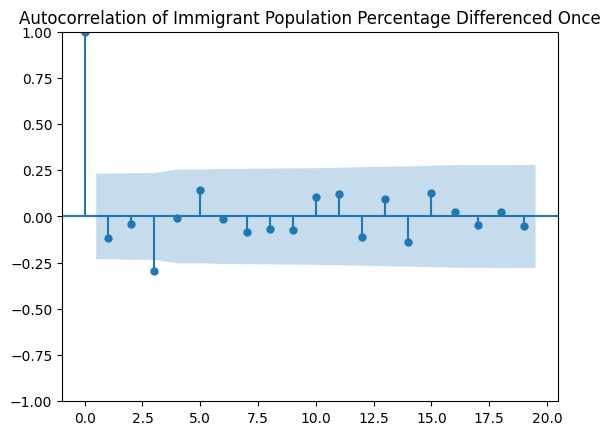

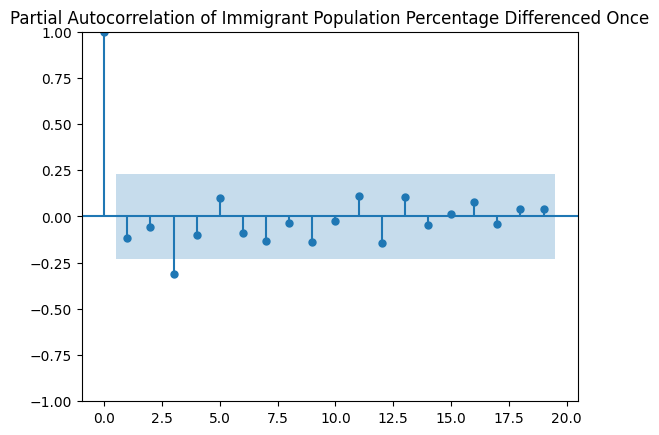

In [374]:
acf_diff = plot_acf(df1_diff, title="Autocorrelation of Immigrant Population Percentage Differenced Once")
pacf_diff = plot_pacf(df1_diff, title="Partial Autocorrelation of Immigrant Population Percentage Differenced Once")

In [375]:


adf_test = adfuller(df1_diff)
print(f'p-value: {adf_test[1]}')

p-value: 1.784415936025569e-09


## Determining ARIMA models parameters p,q

In [376]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(df1, order=(1,1,0))
model_fit = model.fit()
print(model_fit.summary())

                                 SARIMAX Results                                  
Dep. Variable:     migrant_pop_percentage   No. Observations:                   73
Model:                     ARIMA(1, 1, 0)   Log Likelihood                  15.925
Date:                    Fri, 25 Oct 2024   AIC                            -27.850
Time:                            17:27:50   BIC                            -23.296
Sample:                                 0   HQIC                           -26.037
                                     - 73                                         
Covariance Type:                      opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1202      0.103     -1.166      0.244      -0.322       0.082
sigma2         0.0376      0.005      7.439      0.000       0.028       0.048
Ljung-Box (L1) (Q): 

## Residuals

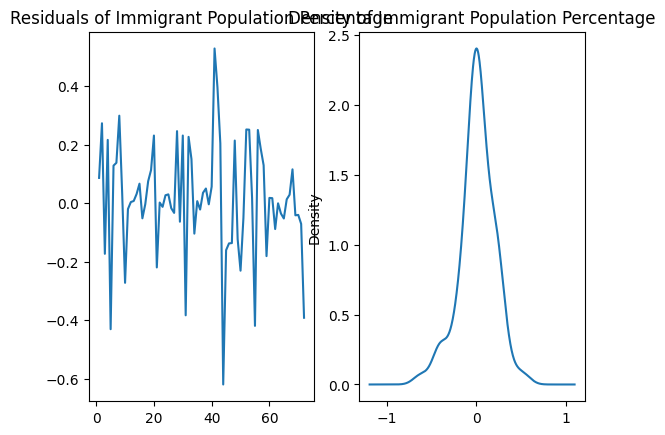

In [377]:
import matplotlib.pyplot as plt
residuals = model_fit.resid[1:]
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals of Immigrant Population Percentage", ax=ax[0])
residuals.plot(title="Density of Immigrant Population Percentage", kind="kde", ax=ax[1])
plt.show()



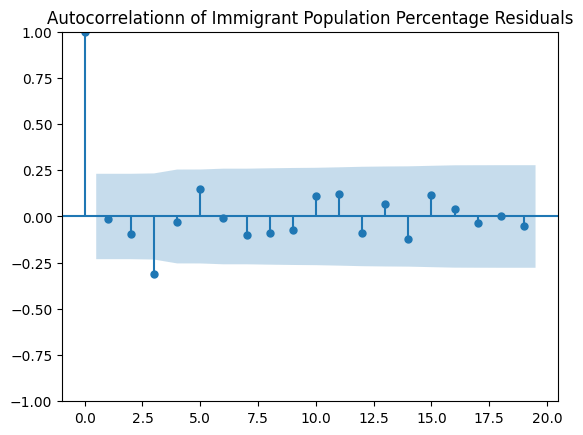

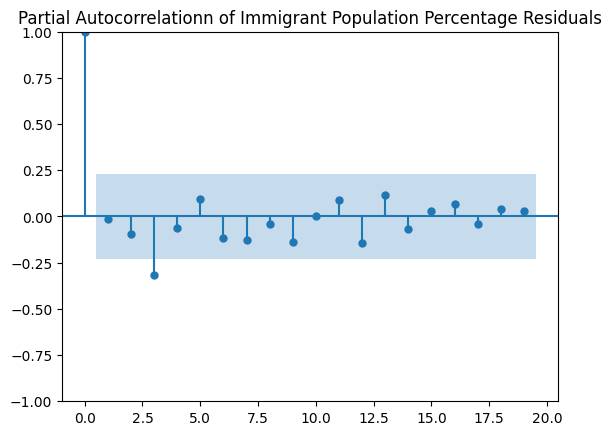

In [378]:
# acf and pacf of residuals
acf_residual = plot_acf(residuals, title="Autocorrelationn of Immigrant Population Percentage Residuals")
pacf_residual = plot_pacf(residuals, title="Partial Autocorrelationn of Immigrant Population Percentage Residuals")

## Performing ARIMA on GDP Percent Change data

<Axes: title={'center': 'GDP Percent Change per year'}>

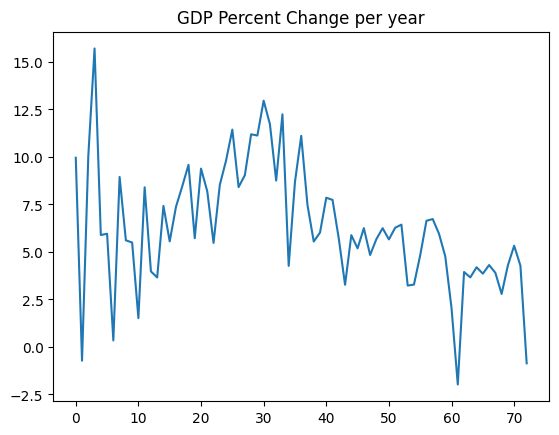

In [379]:
df2 = df["GDP_PC1"]
df2.plot(title="GDP Percent Change per year")

In [380]:

# training set
# msk = (df2.index < len(df2)-15)
# df_train = df2[msk].copy()
# df_test = df2[~msk].copy()

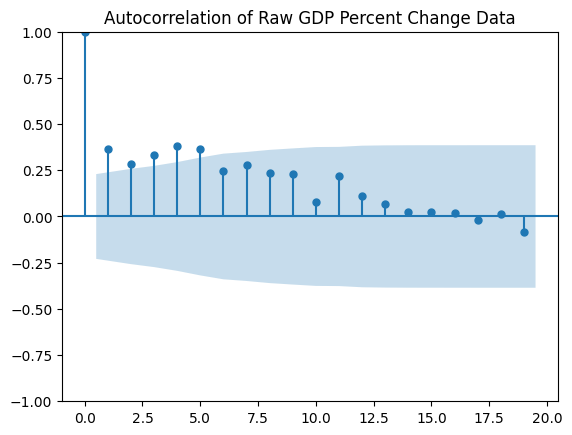

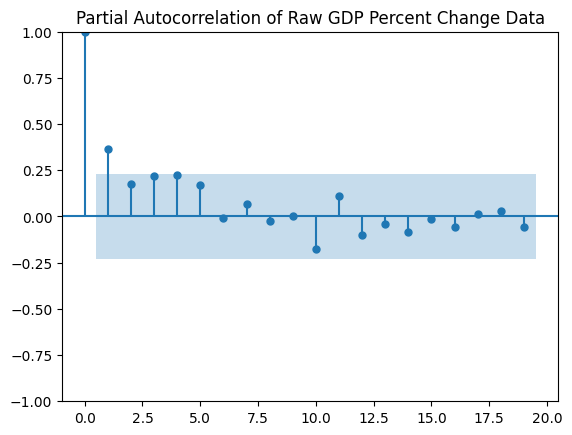

In [381]:

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

acf_original = plot_acf(df2, title="Autocorrelation of Raw GDP Percent Change Data")
pacf_original = plot_pacf(df2, title="Partial Autocorrelation of Raw GDP Percent Change Data")

In [382]:

from statsmodels.tsa.stattools import adfuller
adf_test = adfuller(df2)
print(f'p-value: {adf_test[1]}')

p-value: 0.15523274147268928


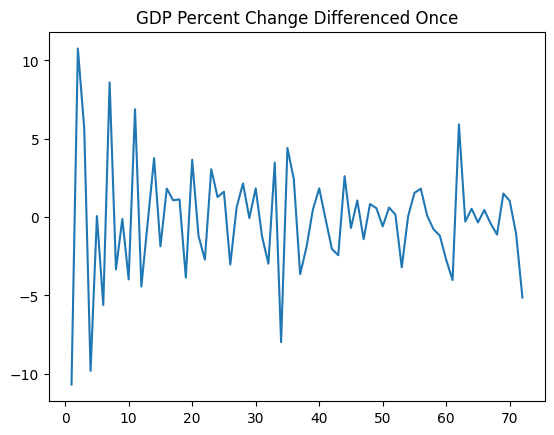

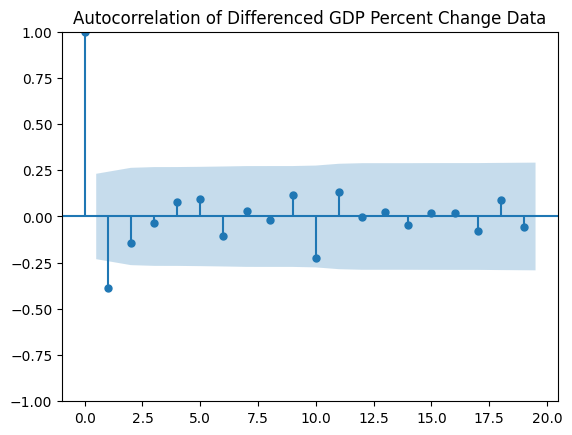

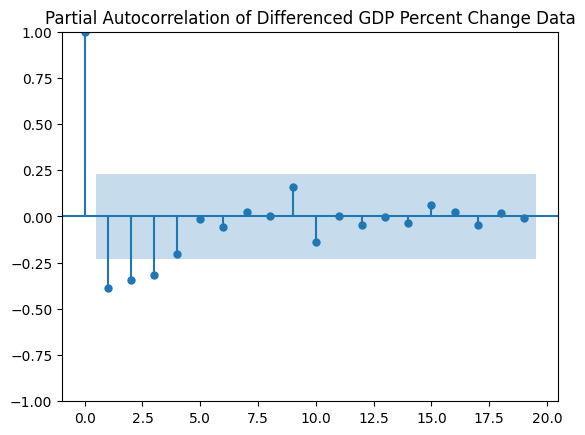

In [383]:
df2_diff = df2.diff().dropna()
df2_diff.plot(title="GDP Percent Change Differenced Once")

acf_diff = plot_acf(df2_diff, title="Autocorrelation of Differenced GDP Percent Change Data")
pacf_diff = plot_pacf(df2_diff, title="Partial Autocorrelation of Differenced GDP Percent Change Data")


In [384]:
from statsmodels.tsa.arima.model import ARIMA
model2 = ARIMA(df2, order=(1,1,1))
model2_fit = model2.fit()
print(model2_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                GDP_PC1   No. Observations:                   73
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -177.689
Date:                Fri, 25 Oct 2024   AIC                            361.378
Time:                        17:27:50   BIC                            368.208
Sample:                             0   HQIC                           364.097
                                 - 73                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0013      0.125      0.011      0.991      -0.244       0.247
ma.L1         -0.7765      0.129     -6.040      0.000      -1.028      -0.525
sigma2         8.0455      1.166      6.898      0.0

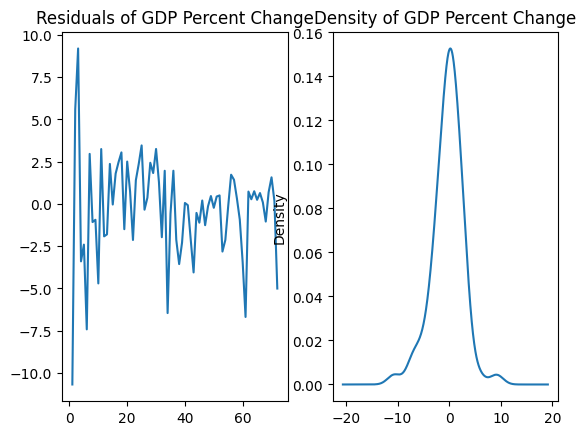

In [385]:
# residuals
import matplotlib.pyplot as plt
residuals2 = model2_fit.resid[1:]
fig, ax = plt.subplots(1,2)
residuals2.plot(title="Residuals of GDP Percent Change", ax=ax[0])
residuals2.plot(title="Density of GDP Percent Change", kind="kde", ax=ax[1])
plt.show()

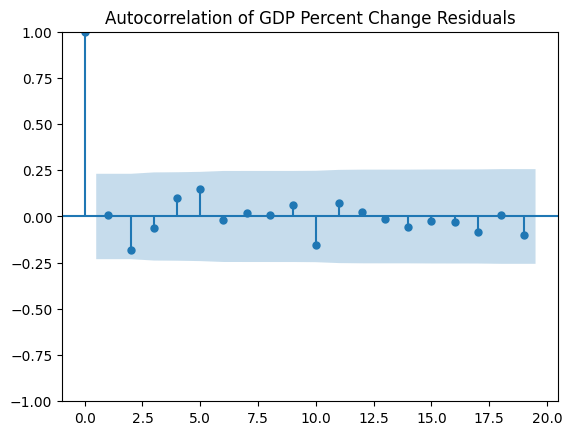

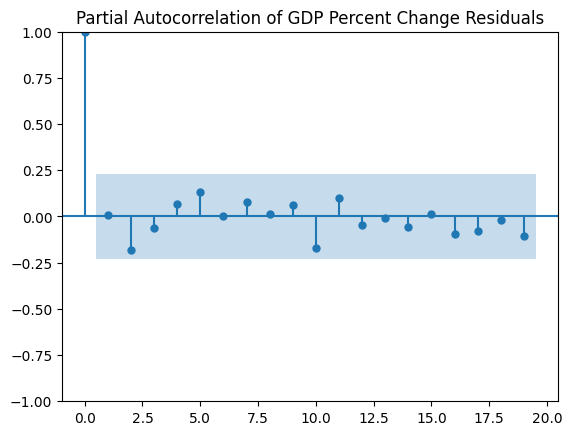

In [386]:
# acf and pacf of residuals
acf_residual = plot_acf(residuals2, title="Autocorrelation of GDP Percent Change Residuals")
pacf_residual = plot_pacf(residuals2, title="Partial Autocorrelation of GDP Percent Change Residuals")

## Performing ARIMA on Unemployment Rate

<Axes: title={'center': 'Unemployment Rate'}>

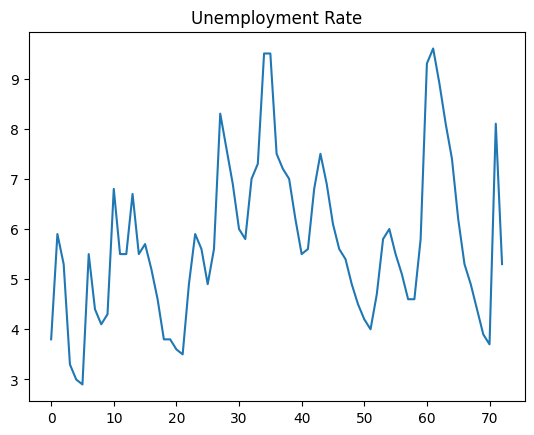

In [387]:
df3 = df["Unemployment_rate"]
df3.plot(title="Unemployment Rate")

In [388]:
# msk = (df3.index < len(df3)-15)
# df_train = df3[msk].copy()
# df_test = df3[~msk].copy()

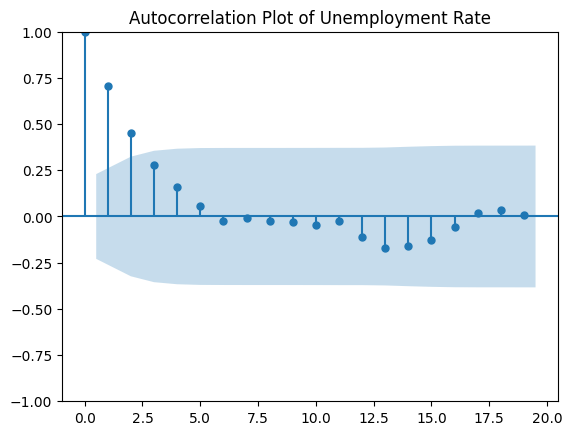

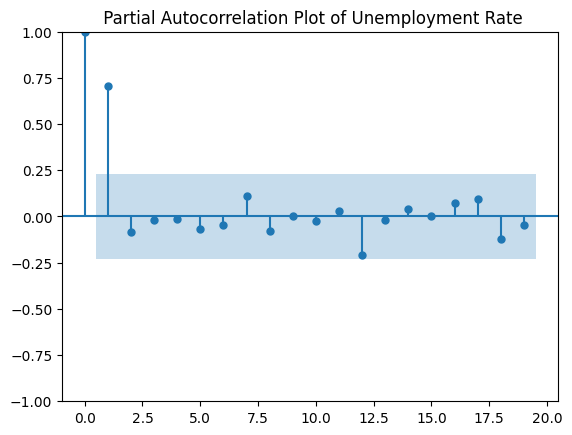

In [389]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

acf_original = plot_acf(df3, title="Autocorrelation Plot of Unemployment Rate")
pacf_original = plot_pacf(df3, title=" Partial Autocorrelation Plot of Unemployment Rate")

In [390]:

from statsmodels.tsa.stattools import adfuller
adf_test = adfuller(df3)
print(f'p-value: {adf_test[1]}')

p-value: 0.008105371788975545


In [391]:
from statsmodels.tsa.arima.model import ARIMA
model3 = ARIMA(df3, order=(1,0,2))
model3_fit = model3.fit()
print(model3_fit.summary())

                               SARIMAX Results                                
Dep. Variable:      Unemployment_rate   No. Observations:                   73
Model:                 ARIMA(1, 0, 2)   Log Likelihood                -111.506
Date:                Fri, 25 Oct 2024   AIC                            233.012
Time:                        17:27:51   BIC                            244.464
Sample:                             0   HQIC                           237.576
                                 - 73                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.6655      0.586      9.664      0.000       4.516       6.814
ar.L1          0.6184      0.306      2.024      0.043       0.019       1.217
ma.L1          0.1968      0.314      0.627      0.5

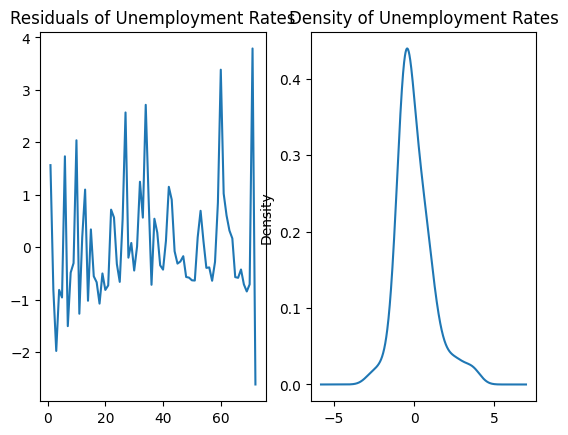

In [392]:
# residuals
import matplotlib.pyplot as plt
residuals3 = model3_fit.resid[1:]
fig, ax = plt.subplots(1,2)
residuals3.plot(title="Residuals of Unemployment Rates", ax=ax[0])
residuals3.plot(title="Density of Unemployment Rates", kind="kde", ax=ax[1])
plt.show()

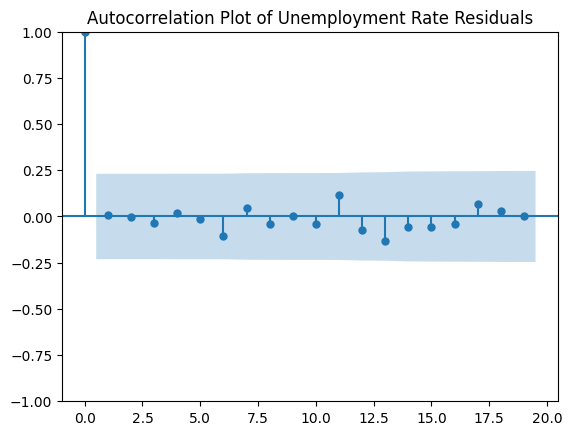

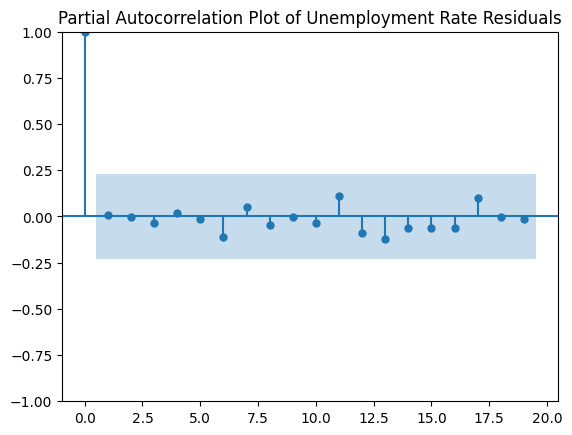

In [393]:
# acf and pacf of residuals
acf_residual = plot_acf(residuals3, title="Autocorrelation Plot of Unemployment Rate Residuals")
pacf_residual = plot_pacf(residuals3, title="Partial Autocorrelation Plot of Unemployment Rate Residuals")

## Performing Cross Correlation

In [394]:
from statsmodels.tsa.stattools import ccf    

'''
residualsX: run arima on data X and obtain residuals
stationaryY: data Y (not with arima), but needs to be stationary ???? according to website
'''
def cross_corr(residualsX, stationaryY, lags=0):
	# explaining x with y
    print("\nCross-Correlation for lags up to {}: ".format(lags))
    for lag in range(-lags, lags+1):  # Includes negative lags
        cross_corr = ccf(residualsX, stationaryY, adjusted=False)[lag + lags]
        print(f"Lag = {lag}: {cross_corr}")


In [399]:
# cross corr with immigrant and gdp data
cross_corr(residuals, df2_diff, 10)


Cross-Correlation for lags up to 10: 
Lag = -10: -0.0028818209095736397
Lag = -9: 0.043695258795066715
Lag = -8: 0.11455628450286326
Lag = -7: -0.2419379157648475
Lag = -6: 0.06390365329565693
Lag = -5: 0.05096728710864383
Lag = -4: 0.12421379183579867
Lag = -3: -0.10004887537303807
Lag = -2: -0.05770078816709204
Lag = -1: -0.011214665935089387
Lag = 0: -0.02004536827822639
Lag = 1: -0.09983214548651523
Lag = 2: 0.23094550539784994
Lag = 3: 0.15698793286225796
Lag = 4: -0.15833652420535407
Lag = 5: -0.06438043735781614
Lag = 6: -0.04378352240837403
Lag = 7: 0.1437925028106593
Lag = 8: 0.07178059095655874
Lag = 9: -0.07500183110750451
Lag = 10: -0.1530163083019344


In [400]:
cross_corr(df1_diff, df2_diff, 10)


Cross-Correlation for lags up to 10: 
Lag = -10: -0.015805176664147075
Lag = -9: 0.05003921856235379
Lag = -8: 0.10860631957558618
Lag = -7: -0.25423287703330266
Lag = -6: 0.0924559868045736
Lag = -5: 0.040434038118314225
Lag = -4: 0.11872125233304893
Lag = -3: -0.11409001974020976
Lag = -2: -0.04332974657525104
Lag = -1: -0.0065282465644069185
Lag = 0: -0.018942534305512876
Lag = 1: -0.1025692275493287
Lag = 2: 0.24520488603700333
Lag = 3: 0.12881770227244255
Lag = 4: -0.1715927179259518
Lag = 5: -0.04261820350330386
Lag = 6: -0.038492687354711355
Lag = 7: 0.14552607442396814
Lag = 8: 0.05217200821737162
Lag = 9: -0.08088487177234689
Lag = 10: -0.1392092655656763
